In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False


In [8]:
def simulate_coin_tosses(n_tosses=100, p=0.5):
    random_numbers = np.random.uniform(0, 1, n_tosses)
    return (random_numbers >= (1 - p)).astype(int) 
    #сравниваем каждое число с порогом (1-p).
    #если true - преобразовываем в орла, нет - в решку

def count_heads(tosses):
    return np.sum(tosses)

def find_max_streak(tosses, target=1):
    if len(tosses) == 0:
        return 0
    max_streak = 0
    current_streak = 0
    for toss in tosses:
        if toss == target:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    return max_streak

def has_streak_of_length(tosses, length=5, target=1):
    return find_max_streak(tosses, target) >= length

def analyze_coin_with_probability(p, n_experiments=1000, n_tosses=100):
    heads_counts = []
    has_5_streaks = []
    max_streaks = []
    for _ in range(n_experiments):
        tosses = simulate_coin_tosses(n_tosses, p)
        heads = count_heads(tosses)
        has_5_heads = has_streak_of_length(tosses, 5)
        max_streak = find_max_streak(tosses)
        heads_counts.append(heads)
        has_5_streaks.append(has_5_heads)
        max_streaks.append(max_streak)
    heads_counts = np.array(heads_counts)
    has_5_streaks = np.array(has_5_streaks)
    max_streaks = np.array(max_streaks)
    avg_heads = heads_counts.mean()
    interval_width = np.percentile(heads_counts, 97.5) - np.percentile(heads_counts, 2.5)
    prob_5_streak = has_5_streaks.mean()
    avg_max_streak = max_streaks.mean()
    return {
        'expected_heads': avg_heads,
        'interval_width': interval_width,
        'prob_5_streak': prob_5_streak,
        'avg_max_streak': avg_max_streak,
        'heads_counts': heads_counts,
        'has_5_streaks': has_5_streaks,
        'max_streaks': max_streaks
    }


In [10]:
np.random.seed(13)
#"зерно" для генерации случайаных чисел
#Рандомное число, чтобы при послед запусках рандомные число были те же
print("Моделирование эксперимента: 100 бросков монеты")

n_experiments = 10000
print(f"Проводим {n_experiments} экспериментов")

result = analyze_coin_with_probability(0.5, n_experiments)
heads_counts = result['heads_counts']
has_5_streaks = result['has_5_streaks']
max_streaks = result['max_streaks']


Моделирование эксперимента: 100 бросков монеты
Проводим 10000 экспериментов


In [4]:
print("\nОТВЕТЫ НА ВОПРОСЫ:")

# Вопрос 1
avg_heads = heads_counts.mean()
print(f"1. Среднее число орлов: {avg_heads:.2f}")
print(f"   Теоретическое ожидание: {100 * 0.5}")

# Вопрос 2
prob_more_than_60 = np.mean(heads_counts > 60)
print(f"\n2. Вероятность получить больше 60 орлов: {prob_more_than_60:.4f} ({prob_more_than_60*100:.2f}%)")
#f позволяет вставлять {}; .nf - отображать n знаков после запятой;  
# Вопрос 3
print(f"\n3. Вероятности для интервалов:")
intervals = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), 
             (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]
for start, end in intervals:
    if end == 100:
        prob = np.mean((heads_counts >= start) & (heads_counts <= end))
        print(f"   [{start}, {end}]: {prob:.4f} ({prob*100:.2f}%)")
    else:
        prob = np.mean((heads_counts >= start) & (heads_counts < end))
        print(f"   [{start}, {end}): {prob:.4f} ({prob*100:.2f}%)")

# Вопрос 4
percentile_2_5 = np.percentile(heads_counts, 2.5)
percentile_97_5 = np.percentile(heads_counts, 97.5)
print(f"\n4. 95% предсказательный интервал: [{percentile_2_5:.0f}, {percentile_97_5:.0f}]")
print(f"   Ширина интервала: {percentile_97_5 - percentile_2_5:.0f}")

# Вопрос 5
prob_5_streak = np.mean(has_5_streaks)
print(f"\n5. Вероятность найти серию из 5 орлов подряд: {prob_5_streak:.4f} ({prob_5_streak*100:.2f}%)")



ОТВЕТЫ НА ВОПРОСЫ:
1. Среднее число орлов: 49.99
   Теоретическое ожидание: 50.0

2. Вероятность получить больше 60 орлов: 0.0159 (1.59%)

3. Вероятности для интервалов:
   [0, 10): 0.0000 (0.00%)
   [10, 20): 0.0000 (0.00%)
   [20, 30): 0.0000 (0.00%)
   [30, 40): 0.0182 (1.82%)
   [40, 50): 0.4460 (44.60%)
   [50, 60): 0.5087 (50.87%)
   [60, 70): 0.0271 (2.71%)
   [70, 80): 0.0000 (0.00%)
   [80, 90): 0.0000 (0.00%)
   [90, 100]: 0.0000 (0.00%)

4. 95% предсказательный интервал: [40, 60]
   Ширина интервала: 20

5. Вероятность найти серию из 5 орлов подряд: 0.8072 (80.72%)


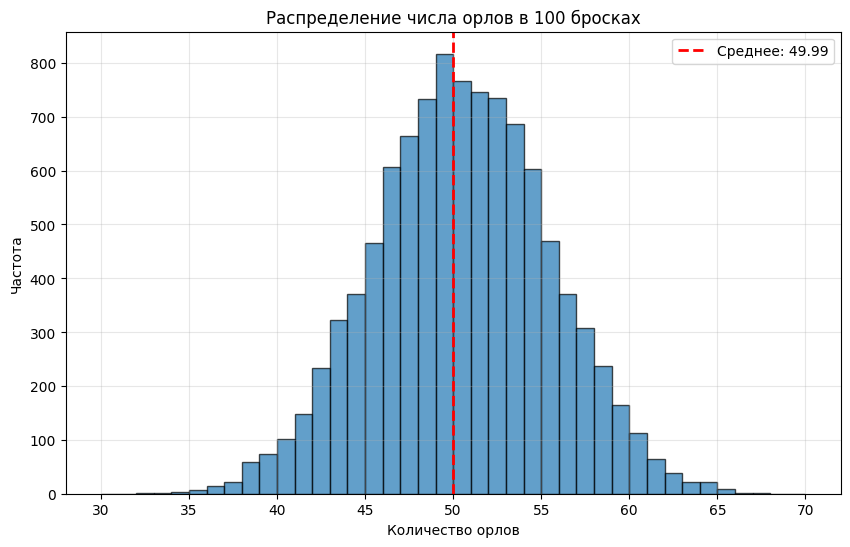

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(heads_counts, bins=range(30, 71), alpha=0.7, edgecolor='black')
plt.axvline(avg_heads, color='red', linestyle='--', linewidth=2, label=f'Среднее: {avg_heads:.2f}')
plt.xlabel('Количество орлов')
plt.ylabel('Частота')
plt.title('Распределение числа орлов в 100 бросках')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [6]:
print("\n6. Анализ зависимости от вероятности p:")

p_values = np.linspace(0.01, 0.99, 100)
expected_heads_list = []
interval_widths_list = []
prob_5_streaks_list = []
avg_max_streaks_list = []

for p in p_values:
    result = analyze_coin_with_probability(p, n_experiments=10000)
    expected_heads_list.append(result['expected_heads'])
    interval_widths_list.append(result['interval_width'])
    prob_5_streaks_list.append(result['prob_5_streak'])
    avg_max_streaks_list.append(result['avg_max_streak'])



6. Анализ зависимости от вероятности p:


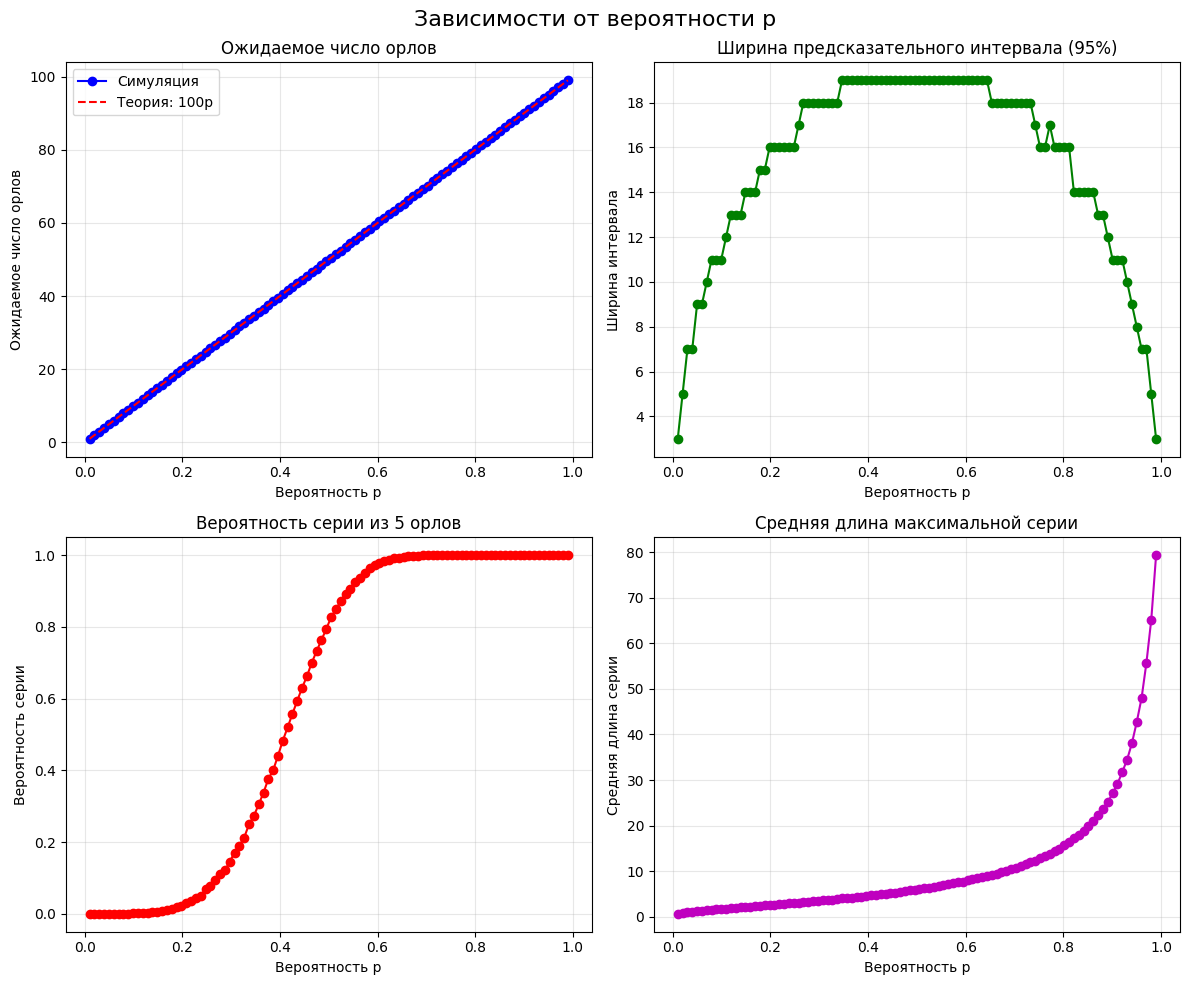

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Зависимости от вероятности p', fontsize=16)

ax1.plot(p_values, expected_heads_list, 'bo-', label='Симуляция')
ax1.plot(p_values, 100 * p_values, 'r--', label='Теория: 100p')
ax1.set_xlabel('Вероятность p')
ax1.set_ylabel('Ожидаемое число орлов')
ax1.set_title('Ожидаемое число орлов')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(p_values, interval_widths_list, 'go-')
ax2.set_xlabel('Вероятность p')
ax2.set_ylabel('Ширина интервала')
ax2.set_title('Ширина предсказательного интервала (95%)')
ax2.grid(True, alpha=0.3)

ax3.plot(p_values, prob_5_streaks_list, 'ro-')
ax3.set_xlabel('Вероятность p')
ax3.set_ylabel('Вероятность серии')
ax3.set_title('Вероятность серии из 5 орлов')
ax3.grid(True, alpha=0.3)

ax4.plot(p_values, avg_max_streaks_list, 'mo-')
ax4.set_xlabel('Вероятность p')
ax4.set_ylabel('Средняя длина серии')
ax4.set_title('Средняя длина максимальной серии')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
